In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import load_model
import time
import matplotlib.pyplot as plt



In [8]:
data = pd.read_csv('spooky_cleaned.csv')
data

,id,text,author
0,id26305,this proces however afforded me no means of as...,EAP
1,id17569,it never once occurred to me that the fumbling...,HPL
2,id11008,in his left hand was a gold snuff box from whi...,EAP
3,id27763,how lovely is spring as we looked from windsor...,MWS
4,id12958,finding nothing else not even gold the superin...,HPL
...,...,...,...
19574,id17718,i could have fancied while i looked at it that...,EAP
19575,id08973,the lids clenched themselves together as if in...,EAP
19576,id05267,mais il faut agir that is to say a frenchman n...,EAP
19577,id17513,for an item of news like this it strikes us it...,EAP


In [9]:
le = LabelEncoder()
data['author_encoded'] = le.fit_transform(data['author'])
data

,id,text,author,author_encoded
0,id26305,this proces however afforded me no means of as...,EAP,0
1,id17569,it never once occurred to me that the fumbling...,HPL,1
2,id11008,in his left hand was a gold snuff box from whi...,EAP,0
3,id27763,how lovely is spring as we looked from windsor...,MWS,2
4,id12958,finding nothing else not even gold the superin...,HPL,1
...,...,...,...,...
19574,id17718,i could have fancied while i looked at it that...,EAP,0
19575,id08973,the lids clenched themselves together as if in...,EAP,0
19576,id05267,mais il faut agir that is to say a frenchman n...,EAP,0
19577,id17513,for an item of news like this it strikes us it...,EAP,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data['text'].values,              
    data['author_encoded'].values,    
    test_size=0.3,                    
    random_state=0,                 
    stratify = data['author_encoded'].values 
)


In [31]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(binary=False,analyzer= 'word', stop_words='english')

vectorizer.fit(X_train)

train_cv = vectorizer.transform(X_train)
test_cv = vectorizer.transform(X_test)


In [32]:
count_array_cv = train_cv.toarray()
df = pd.DataFrame(data=count_array_cv,columns = vectorizer.get_feature_names_out())
df

,ab,abandon,abandoned,abandoning,abandonment,abaout,abasement,abashment,abate,abated,...,zit,zobna,zobnarian,zodiacal,zokar,zone,zones,zopyrus,zubmizion,zuro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(binary=True,analyzer= 'word', stop_words='english')

vectorizer.fit(X_train)

train_cvb = vectorizer.transform(X_train)
test_cvb = vectorizer.transform(X_test)


In [34]:
count_array_cvb = train_cvb.toarray()
df = pd.DataFrame(data=count_array_cvb,columns = vectorizer.get_feature_names_out())
df

,ab,abandon,abandoned,abandoning,abandonment,abaout,abasement,abashment,abate,abated,...,zit,zobna,zobnarian,zodiacal,zokar,zone,zones,zopyrus,zubmizion,zuro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer= 'word', stop_words='english')

tfidf_vectorizer.fit(X_train)

train_tfidf = tfidf_vectorizer.transform(X_train)
test_tfidf = tfidf_vectorizer.transform(X_test)

In [36]:
count_array_tfidf = train_tfidf.toarray()
df = pd.DataFrame(data=count_array_tfidf,columns = tfidf_vectorizer.get_feature_names_out())
df

,ab,abandon,abandoned,abandoning,abandonment,abaout,abasement,abashment,abate,abated,...,zit,zobna,zobnarian,zodiacal,zokar,zone,zones,zopyrus,zubmizion,zuro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from sklearn.neural_network import MLPClassifier

model1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, solver='adam', random_state=1)

model2 = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=200, solver='m', random_state=1)

model3 = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=200, solver='adam', random_state=1)

In [ ]:
import os
import pickle
from sklearn.metrics import classification_report

# Vérifier et créer le dossier "models" s'il n'existe pas
os.makedirs("models", exist_ok=True)

# Entraînement et sauvegarde des modèles
models = [
    model1,
    model2,
    model3
]
representations = [(train_cv, test_cv), (train_tfidf, test_tfidf),(train_cvb,test_cvb)]
for i, model in enumerate(models):
    print(f"Model {i+1}")
    for j, rep in enumerate(representations):
        # Entraînement du modèle
        model.fit(rep[0], y_train)

        # Prédiction sur le jeu de train
        y_pred = model.predict(rep[0])

        # Évaluation du modèle
        print(f"Representation {j+1}:")
        print(classification_report(y_train, y_pred))

        # Sauvegarde du modèle
        filename = f'models/mlp_{model.hidden_layer_sizes}_rep_{j+1}.sav'
        with open(filename, 'wb') as file:
            pickle.dump(model, file)

        print(f"Model saved as {filename}\n")
    


Model 1


c:\Users\anaconda3\envs\nlp\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Representation 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5530
           1       1.00      1.00      1.00      3944
           2       1.00      1.00      1.00      4231

    accuracy                           1.00     13705
   macro avg       1.00      1.00      1.00     13705
weighted avg       1.00      1.00      1.00     13705

Model saved as models/mlp_(100,)_rep_1.sav



In [ ]:
for i, model in enumerate(models):
    print(f"\n========== Model {i+1} ==========")

    for j, test_rep in enumerate([test_cv, test_tfidf, test_cvb]):
        print(f"\n--- Representation {j+1} ---")

        # Chargement du modèle
        filename = f'models/mlp_{model.hidden_layer_sizes}_rep_{j+1}.sav'
        with open(filename, 'rb') as file:
            loaded_model = pickle.load(file)

        # Mesure du temps de prédiction
        start_time = time.time()
        y_pred = loaded_model.predict(test_rep)
        end_time = time.time()

        # Affichage du rapport de classification
        print("🔍 Rapport de classification sur l'ensemble de test :")
        print(classification_report(y_test, y_pred))

        # Temps d'exécution
        print(f"⏳ Temps de prédiction : {(end_time - start_time):.4f} secondes")



========== Model 1 ==========

--- Representation 1 ---
🔍 Rapport de classification sur l'ensemble de test :
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      2370
           1       0.76      0.71      0.74      1691
           2       0.72      0.74      0.73      1813

    accuracy                           0.74      5874
   macro avg       0.74      0.73      0.74      5874
weighted avg       0.74      0.74      0.74      5874

⏳ Temps de prédiction : 0.0090 secondes

--- Representation 2 ---
🔍 Rapport de classification sur l'ensemble de test :
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      2370
           1       0.78      0.73      0.76      1691
           2       0.74      0.76      0.75      1813

    accuracy                           0.76      5874
   macro avg       0.76      0.75      0.76      5874
weighted avg       0.76      0.76      0.76      5874

⏳ Temps d

### Word2Vec

In [ ]:
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')
word2vec_model

In [11]:
from gensim.models.word2vec import Word2Vec
from gensim.models import FastText, KeyedVectors

X_train_tokens = [text.split() for text in X_train]    
X_test_tokens = [text.split() for text in X_test]


# Skip-Gram
model_w2v_sg = Word2Vec(X_train_tokens, vector_size=200, window=5, min_count=1, workers=4, sg=1) 
# CBOW
model_w2v_cbow = Word2Vec(X_train_tokens, vector_size=200, window=5, min_count=1, workers=4, sg=0) 

model_w2v_sg.save("word2vec_sg.model")
model_w2v_cbow.save("word2vec_cbow.model")
model_w2v_sg = Word2Vec.load("word2vec_sg.model")


### Glove model

In [12]:
model_glove = KeyedVectors.load_word2vec_format('glove.6B.100d.word2vec.txt', binary=False)


### Fast text

In [13]:
model_fasttext = FastText(X_train_tokens, vector_size=200, window=5, min_count=1, workers=4)

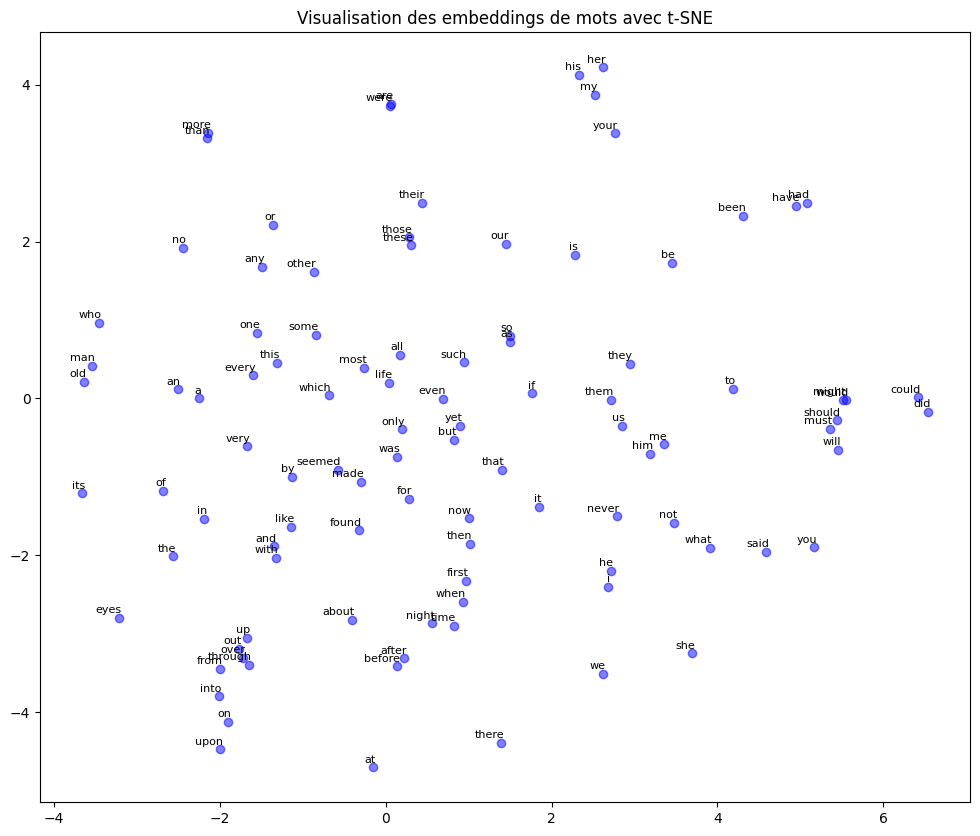

In [14]:
def tsne_plot(model, num_words=100):
    """
    Visualise les embeddings de mots avec t-SNE.

    :param model: Modèle de Word Embeddings (GloVe ou Word2Vec)
    :param num_words: Nombre de mots à afficher (max recommandé : 500)
    """
    # Récupérer les mots du vocabulaire
    vocab = list(model.index_to_key)[:num_words]  # Limite à `num_words`
    wordvecs = np.array([model[word] for word in vocab])  # Convertir en np.array()
    labels = vocab  # Utiliser les mêmes mots comme labels

    # Appliquer t-SNE pour réduire à 2 dimensions
    tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)  # ✅ Plus d'erreur ici

    # Séparer les coordonnées x et y
    x, y = coordinates[:, 0], coordinates[:, 1]

    # Affichage avec Matplotlib
    plt.figure(figsize=(12, 10))
    plt.scatter(x, y, color='blue', alpha=0.5)

    # Annoter chaque point avec son mot
    for i in range(len(labels)):
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(2, 2),
                     textcoords='offset points', ha='right', va='bottom', fontsize=8)

    plt.title("Visualisation des embeddings de mots avec t-SNE")
    plt.show()

# Exécuter la fonction
tsne_plot(model_w2v_sg.wv)


### Vectorizing our sentence (`Sentence --> Embedding Vector`)  by calculating the MEAN

In [16]:
def get_mean_vector(w2v_vectors, words):
    words = [word for word in words if word in w2v_vectors]
    if words:
        avg_vector = np.mean(w2v_vectors[words], axis=0)
    else:
        avg_vector = np.zeros_like(w2v_vectors['hi'])
    return avg_vector

Skip-Gram

In [17]:
df_data = []
for token in X_train_tokens:
    df_data.append(get_mean_vector(model_w2v_sg.wv,token))
        
train_embeddings = pd.DataFrame(data={'Skip-Gram':df_data})


df_data = []
for token in X_test_tokens:
    df_data.append(get_mean_vector(model_w2v_sg.wv,token))
        
test_embeddings = pd.DataFrame(data={'Skip-Gram':df_data})

Cbow

In [18]:
df_data = []
for token in X_train_tokens:
    df_data.append(get_mean_vector(model_w2v_cbow.wv,token))
        
train_embeddings['Cbow'] = df_data

df_data = []
for token in X_test_tokens:
    df_data.append(get_mean_vector(model_w2v_cbow.wv,token))
        
test_embeddings['Cbow'] = df_data

Fast Text

In [19]:
df_data = []
for token in X_train_tokens:
    df_data.append(get_mean_vector(model_fasttext.wv,token))
        
train_embeddings['FastText'] = df_data

df_data = []
for token in X_test_tokens:
    df_data.append(get_mean_vector(model_fasttext.wv,token))
        
test_embeddings['FastText'] = df_data

In [20]:
train_embeddings['author'] = y_train
test_embeddings['author'] = y_test

In [21]:
train_embeddings

,Skip-Gram,Cbow,FastText,author
0,"[0.1006346, -0.14624661, -0.05967131, 0.055511...","[0.060942173, -0.1937153, -0.16994426, 0.41663...","[-0.4925448, -0.2697546, 0.9544221, 0.08472851...",0
1,"[0.08173524, -0.085856035, -0.03709901, 0.1010...","[0.06299592, -0.14731549, -0.17959946, 0.45359...","[-0.40251073, -0.23788399, 0.8788073, 0.097626...",0
2,"[0.036061708, -0.03136979, -0.092183396, 0.130...","[0.06179365, -0.13935421, -0.18717375, 0.45282...","[-0.39470348, -0.20289133, 0.8789902, 0.074445...",0
3,"[0.030181076, -0.13283777, -0.001443626, 0.075...","[0.07651145, -0.5040844, -0.14400385, 0.447720...","[-0.45621738, -0.43665805, 0.52890646, 0.14371...",2
4,"[0.04315272, -0.1312225, -0.06485944, 0.097332...","[0.053137586, -0.23096977, -0.15234663, 0.3561...","[-0.44698232, -0.2327406, 0.72122467, 0.099589...",0
...,...,...,...,...
13700,"[0.037147433, -0.08377172, -0.06834259, 0.0748...","[0.04519409, -0.113598, -0.15516289, 0.3223657...","[-0.41944885, -0.20814657, 0.8816508, 0.098674...",1
13701,"[0.029531509, -0.093389966, -0.015166034, 0.09...","[0.06660112, -0.17440255, -0.13580176, 0.33870...","[-0.41283092, -0.18499184, 0.71852213, 0.09446...",1
13702,"[0.08071755, -0.016242094, 0.016197039, 0.0813...","[0.10763004, -0.037269734, -0.10513617, 0.4812...","[-0.50601614, -0.26603353, 0.8458171, 0.057674...",0
13703,"[0.07332838, 0.031025937, -0.114560455, 0.0860...","[0.12480154, 0.028560204, -0.15957844, 0.43660...","[-0.3413396, -0.11767501, 0.9184087, 0.1013122...",0


In [22]:
test_embeddings

,Skip-Gram,Cbow,FastText,author
0,"[0.06433286, -0.08566419, -0.069974765, 0.0640...","[0.07151189, -0.17537789, -0.21111816, 0.39438...","[-0.41420138, -0.2269934, 0.8266674, 0.1050206...",0
1,"[0.07428444, -0.091036044, -0.059336577, 0.054...","[0.058910772, -0.19537236, -0.19571762, 0.3957...","[-0.42953676, -0.21870682, 0.71899456, 0.13635...",0
2,"[0.005646069, -0.08031239, -0.04304853, 0.0897...","[0.07942471, -0.22363795, -0.19928649, 0.51269...","[-0.45219538, -0.28359184, 0.8759901, 0.090727...",1
3,"[0.111525305, -0.12892629, -0.056154966, 0.049...","[0.066709526, -0.2469904, -0.19604506, 0.40971...","[-0.44052488, -0.27787682, 0.85142034, 0.10816...",0
4,"[0.060057864, -0.10287843, -0.070693254, 0.092...","[0.061063465, -0.17875908, -0.18625946, 0.4139...","[-0.417535, -0.207956, 0.79449904, 0.10850104,...",2
...,...,...,...,...
5869,"[0.09901522, -0.14873536, -0.039789576, 0.0129...","[0.08119359, -0.2907354, -0.16680685, 0.351933...","[-0.46050546, -0.27573538, 0.92885053, 0.10431...",0
5870,"[0.049429182, -0.1430128, -0.06911654, 0.06397...","[0.07806796, -0.29861313, -0.17407809, 0.36107...","[-0.3996175, -0.2980364, 0.7453191, 0.12867297...",0
5871,"[0.07945734, -0.19035237, -0.07645148, 0.04484...","[0.061086662, -0.4285802, -0.20449159, 0.38382...","[-0.38755968, -0.3144946, 0.6049602, 0.1132195...",2
5872,"[0.08439508, -0.13937223, -0.088568024, 0.0765...","[0.06304675, -0.19520791, -0.18942961, 0.42929...","[-0.4666494, -0.2711766, 0.9173619, 0.09603631...",0


### Train and Test

Skip-Gram with MLP's

In [23]:
#Lets try to train our data using Skip-Gram
X_train =  pd.DataFrame(list(train_embeddings['Skip-Gram'])).reset_index(drop=True)
y_train = pd.DataFrame(train_embeddings['author'])

X_test =  pd.DataFrame(list(test_embeddings['Skip-Gram'])).reset_index(drop=True)
y_test = pd.DataFrame(test_embeddings['author'])


In [ ]:
mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(200,)),  # Adapter la taille selon tes embeddings
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 classes
])

adam = Adam(learning_rate=0.01)
mlp_model.compile(loss=SparseCategoricalCrossentropy(), optimizer=adam, metrics=['accuracy'])

skip_history = mlp_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

mlp_model.save("mlp_model_Skip-Gram.h5")

mlp_model_loaded = load_model("mlp_model_Skip-Gram.h5")

loss, accuracy = mlp_model_loaded.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

c:\Users\anaconda3\envs\nlp\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5106 - loss: 0.9758 - val_accuracy: 0.5184 - val_loss: 0.9673
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6003 - loss: 0.8673 - val_accuracy: 0.6020 - val_loss: 0.8731
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6219 - loss: 0.8419 - val_accuracy: 0.6197 - val_loss: 0.8423
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6202 - loss: 0.8432 - val_accuracy: 0.6324 - val_loss: 0.8256
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6407 - loss: 0.8129 - val_accuracy: 0.6227 - val_loss: 0.8344
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6265 - loss: 0.8311 - val_accuracy: 0.5960 - val_loss: 0.8806
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6285 - loss: 0.8290 - val_accuracy: 0.6430 - val_loss: 0.8159
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6433 - loss: 0.8098 - val_accuracy: 0.

184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6545 - loss: 0.7941
Test Accuracy: 0.6576


Cbow with MLP's

In [25]:
X_train =  pd.DataFrame(list(train_embeddings['Cbow'])).reset_index(drop=True)
y_train = pd.DataFrame(train_embeddings['author'])

X_test =  pd.DataFrame(list(test_embeddings['Cbow'])).reset_index(drop=True)
y_test = pd.DataFrame(test_embeddings['author'])

In [26]:
mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(200,)),  
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  
])

adam = Adam(learning_rate=0.01)
mlp_model.compile(loss=SparseCategoricalCrossentropy(), optimizer=adam, metrics=['accuracy'])

cbow_history = mlp_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

mlp_model.save("mlp_model_cbow.h5")

mlp_model_loaded = load_model("mlp_model_cbow.h5")

loss, accuracy = mlp_model_loaded.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/50


c:\Users\anaconda3\envs\nlp\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4215 - loss: 1.0774 - val_accuracy: 0.4435 - val_loss: 1.0268
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4666 - loss: 1.0262 - val_accuracy: 0.4964 - val_loss: 1.0132
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4788 - loss: 1.0148 - val_accuracy: 0.5049 - val_loss: 0.9977
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4932 - loss: 1.0069 - val_accuracy: 0.5034 - val_loss: 0.9934
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5016 - loss: 1.0029 - val_accuracy: 0.5163 - val_loss: 0.9904
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5068 - loss: 0.9936 - val_accuracy: 0.4610 - val_loss: 1.0282
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4966 - loss: 0.9999 - val_accuracy: 0.5218 - val_loss: 0.9876
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5158 - loss: 0.9866 - val_accuracy: 0.4893 - val_

184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5382 - loss: 0.9538
Test Accuracy: 0.5323


FastText with MLP's

In [27]:
X_train =  pd.DataFrame(list(train_embeddings['FastText'])).reset_index(drop=True)
y_train = pd.DataFrame(train_embeddings['author'])

X_test =  pd.DataFrame(list(test_embeddings['FastText'])).reset_index(drop=True)
y_test = pd.DataFrame(test_embeddings['author'])

In [28]:
mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(200,)),  
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  
])

adam = Adam(learning_rate=0.01)
mlp_model.compile(loss=SparseCategoricalCrossentropy(), optimizer=adam, metrics=['accuracy'])

fasttext_history = mlp_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

mlp_model.save("mlp_model_fastText.h5")

mlp_model_loaded = load_model("mlp_model_fastText.h5")

loss, accuracy = mlp_model_loaded.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/50


c:\Users\anaconda3\envs\nlp\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3995 - loss: 1.0910 - val_accuracy: 0.4530 - val_loss: 1.0618
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4415 - loss: 1.0598 - val_accuracy: 0.4680 - val_loss: 1.0547
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4574 - loss: 1.0415 - val_accuracy: 0.4605 - val_loss: 1.0452
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4550 - loss: 1.0472 - val_accuracy: 0.4833 - val_loss: 1.0318
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4630 - loss: 1.0404 - val_accuracy: 0.4523 - val_loss: 1.0424
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4528 - loss: 1.0503 - val_accuracy: 0.4803 - val_loss: 1.0309
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4700 - loss: 1.0285 - val_accuracy: 0.4682 - val_loss: 1.0386
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4728 - loss: 1.0298 - val_accuracy: 0.4959 - val_

184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4990 - loss: 1.0104
Test Accuracy: 0.4911


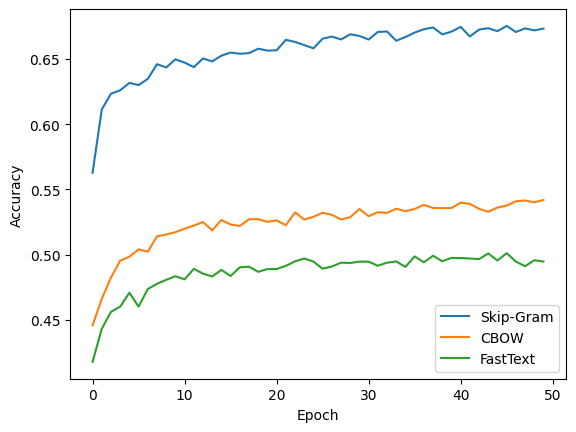

In [29]:
plt.plot(pd.DataFrame(skip_history.history)[['accuracy']], label='Skip-Gram')
plt.plot(pd.DataFrame(cbow_history.history)[['accuracy']], label='CBOW')
plt.plot(pd.DataFrame(fasttext_history.history)[['accuracy',]], label='FastText')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()